> <b>Predict the Automobile Insurance claim</b>

The purpose of an Insurance is to provide protection against the risk of any financial loss. Insurance is a form of risk management in which an insurer agrees to take the risk of the insured entity against future events, uncertain loss due to Tsunami, earthquake or damage against the vehicle or personal property.


One has to predict the claim amount in the Automobile insurance dataset.
Dataset: https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Auto_Insurance_Claims_amount.csv

<b>Importing Necessary Libraries</b>

In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import lightgbm as lgb

In [110]:
# Reading the data
insurance_data= pd.read_csv("Auto_Insurance_Claims_amount.csv")
insurance_data.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [111]:
insurance_data.shape

(9134, 26)

<b>Observation:</b>
There are 9134 rows and 26 attributes in the dataset.

In [112]:
insurance_data.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

In [9]:
object_data= insurance_data.select_dtypes(include=["object"])
object_data.columns

Index(['Customer', 'Country', 'State Code', 'State', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Claim Reason', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

<b>Observation:</b>
There are 18 attributes in the dataset which are object datatype. 

In [15]:
float_data= insurance_data.select_dtypes(include=["float"])
float_data.columns

Index(['Claim Amount', 'Total Claim Amount'], dtype='object')

<b>Observation:</b>
There are 2 attributes in the dataset which are float datatype. 

In [17]:
numerical_data= insurance_data.select_dtypes(include=["int64"])
numerical_data.columns

Index(['Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies'],
      dtype='object')

In [18]:
numerical_data.shape

(9134, 6)

<b>Observation:</b>
There 6 attributes which are of int datatype.

<b>Checking Missing Values</b>

In [20]:
insurance_data.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

<b>Observation:</b>
There is no Missing Value in the dataset.

<b>Summary Statistics</b>

In [21]:
insurance_data.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


<b>Observations:</b>
<li> Claim Amount varies from 189 to 8332.</li>
<li> Monthly Premium Auto varies from 61 to 298. </li>

# Exploratory Data Analysis

<b>Uni_variate Analysis</b>

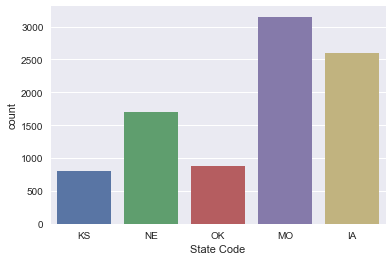

In [43]:
sns.countplot(insurance_data["State Code"])
plt.show()

<b>Observation:</b>
Most of the People are of State which has State Code (MO).

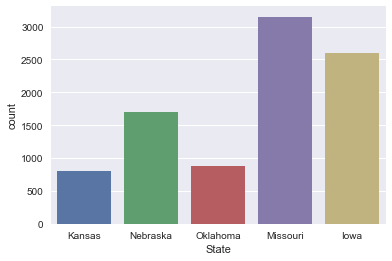

In [45]:
sns.countplot(insurance_data["State"])
plt.show()

<b>Observation:</b>
Most of the people of Missouri.

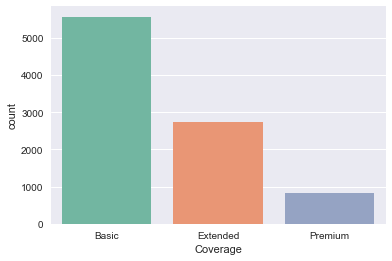

In [73]:
sns.countplot(insurance_data["Coverage"],palette="Set2")
plt.show()

<b>Observation:</b>
Most of the People have Basic Coverage.

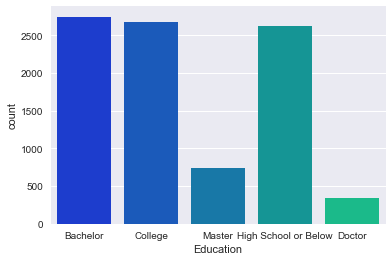

In [75]:
sns.countplot(insurance_data["Education"],palette="winter")
plt.show()

<b>Observation:</b>
Most of the people have done Bachelor.

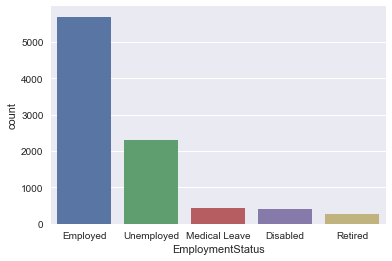

In [47]:
sns.countplot(insurance_data["EmploymentStatus"])
plt.show()

<b>Observation:</b>
Most of the people are Employed.

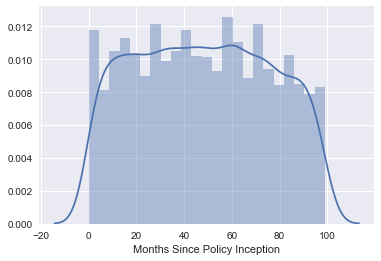

In [71]:
sns.distplot(insurance_data["Months Since Policy Inception"])
plt.show()

<b>Observation:</b>
There are average 60 months since policy inception

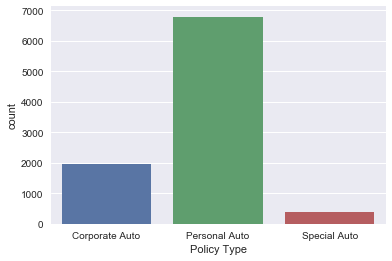

In [49]:
sns.countplot(insurance_data["Policy Type"])
plt.show()

<b>Observation:</b>
Most of the people have Personal Auto Policy.

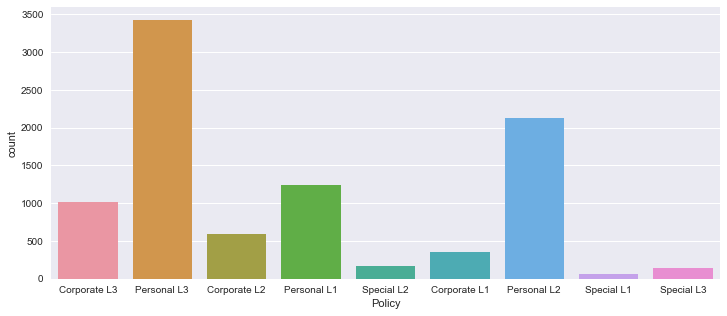

In [70]:
plt.figure(figsize=(12,5))
sns.countplot(insurance_data["Policy"])
plt.show()

<b>Observation:</b>
Most of the people have Personal L3 policy.

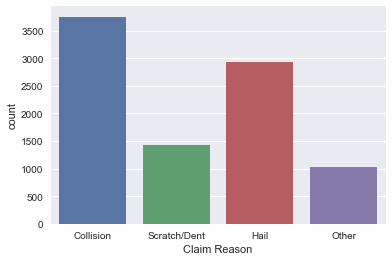

In [56]:
sns.countplot(insurance_data["Claim Reason"])
plt.show()

<b>Observation:</b>
Most of the people claim due to Collision.

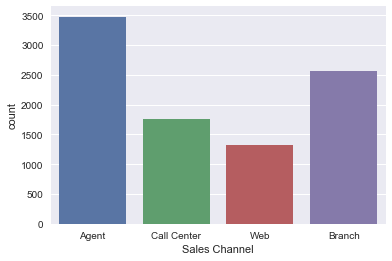

In [57]:
sns.countplot(insurance_data["Sales Channel"])
plt.show()

<b> Observation:</b>
Most of the people have taken policy with the help of Agent.

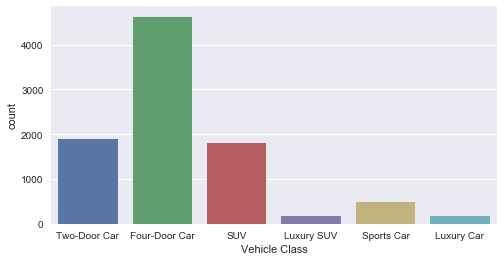

In [79]:
plt.figure(figsize=(8,4))
sns.countplot(insurance_data["Vehicle Class"])
plt.show()

<b>Observation:</b>
Most of the people have Four Door Car.

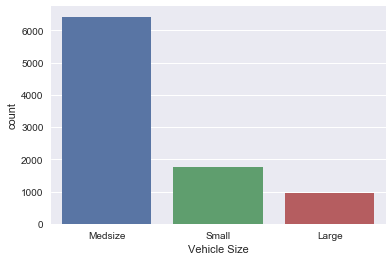

In [60]:
sns.countplot(insurance_data["Vehicle Size"])
plt.show()

<b>Observation:</b>
Most of the People have Medsize vehicle.

<b>Bi-Variate Analysis</b>

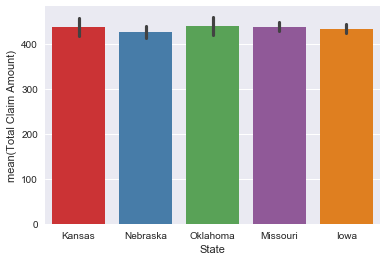

In [84]:
sns.barplot(x="State",y="Total Claim Amount",data=insurance_data,palette="Set1")
plt.show()

<b>Observation:</b>
We see that average total claim amount of Oklahoma is more.

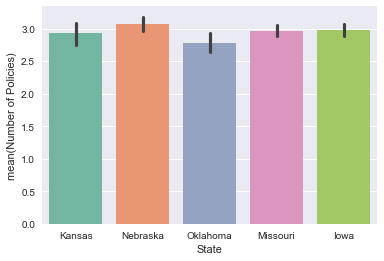

In [88]:
sns.barplot(x="State",y="Number of Policies",data=insurance_data,palette="Set2")
plt.show()

<b>Observation:</b>
We see that Nebraska has more policies as compare to other state.

<b>Multi-Variate Analysis</b>

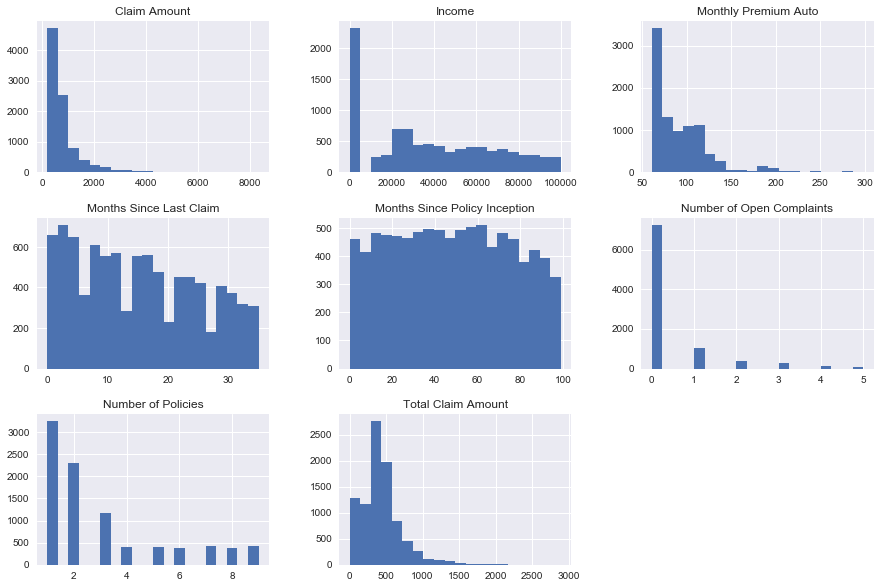

In [89]:
insurance_data.hist(figsize=(15,10),grid=True,bins=20);

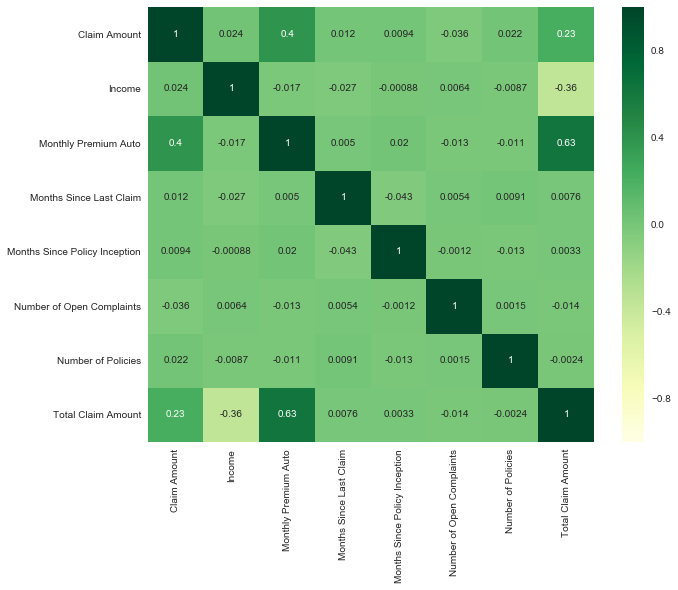

In [90]:
map=insurance_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(map, cmap="YlGn",annot=True)
plt.show()

<b>Observation:</b>
There is strong correlation between Monthly Premium Auto and Totak Claim Amount.

<b>Label Encoder</b>

In [113]:
# Converting the categorical variables 
for col in insurance_data.columns:
    if insurance_data[col].dtype=="object":
        insurance_data[col]=LabelEncoder().fit_transform(insurance_data[col])

<b>Checking Skewness</b>

In [114]:
insurance_data.skew(axis=0)

Customer                         0.000000
Country                          0.000000
State Code                       0.021065
State                            0.021065
Claim Amount                     3.032280
Response                         2.037567
Coverage                         1.031310
Education                        0.333148
Effective To Date                0.033899
EmploymentStatus                 0.832147
Gender                           0.039866
Income                           0.286887
Location Code                    0.009511
Marital Status                  -0.107553
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Policy Type                     -0.468383
Policy                          -0.427639
Claim Reason                     0.733526
Sales Channel                    0.506774
Total Claim Amount               1

In [115]:
for index in insurance_data.skew().index:
    if insurance_data.skew().loc[index]>0.5:
        insurance_data[index]=np.sqrt(insurance_data[index])

In [116]:
insurance_data.skew(axis=0)

Customer                         0.000000
Country                          0.000000
State Code                       0.021065
State                            0.021065
Claim Amount                     1.588852
Response                         2.037567
Coverage                         0.585909
Education                        0.333148
Effective To Date                0.033899
EmploymentStatus                 0.099569
Gender                           0.039866
Income                           0.286887
Location Code                    0.009511
Marital Status                  -0.107553
Monthly Premium Auto             1.493946
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        1.839324
Number of Policies               0.856845
Policy Type                     -0.468383
Policy                          -0.427639
Claim Reason                     0.041050
Sales Channel                   -0.124345
Total Claim Amount               0

<b>Dividing the data into input and output variables</b>

In [118]:
X= insurance_data.drop(["Claim Amount"],axis=1)
y= insurance_data["Claim Amount"]

<b>Standardization</b>

In [120]:
# Lets bring the dataset features into same scale
sc=StandardScaler()
X= sc.fit_transform(X)

<b>Splitting the data into train and test</b>

In [122]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30)

In [126]:
# We are using R2 score to evaluate
from sklearn.metrics import r2_score
def max_r2_score(model,X,y):
    max_r2_score=0
    for r_state in range(42,100):
        X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.30, random_state=r_state)
        model.fit(X_train,y_train)
        y_pred= model.predict(X_test)
        score=r2_score(y_test,y_pred)
        if score>max_r2_score:
            max_r2_score=score
            final_r2_score=r_state
    print("Maximum R2_Score corresponding:",final_r2_score," and it is :",round((max_r2_score),2))

# Machine Learning Models:

As the target variable is continuous (Claim Amount), its regression Problem.  We are using Random Forest Regressor,Decision Tree Regressor, KNN Regressor, Gradient Boosting Regressor and Light GBM.

<b>Random Forest Regressor</b>

In [124]:
rfi=RandomForestRegressor()
param_grid = {
    'max_depth': [80, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [10, 12],
    'n_estimators': [100, 500]
}
rfi= GridSearchCV(rfi, param_grid,cv=5)
rfi.fit(X,y)
rfi.best_params_

{'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 500}

In [127]:
rfi=RandomForestRegressor(max_depth=80,max_features=3,min_samples_leaf=3,min_samples_split=10,n_estimators=500)
max_r2_score(rfi,X,y)

Maximum R2_Score corresponding: 87  and it is : 0.74


In [129]:
pred_rfi= rfi.predict(X_test)
score_rf= rfi.score(X_test, y_test)
print("The accuracy of the Random Forest Regressor Model is:",round((score_rf),2))

The accuracy of the Random Forest Regressor Model is: 0.79


In [130]:
# Cross validation score
mean_rf=cross_val_score(rfi,X,y,cv=10,scoring="r2").mean()
print("Mean R2 Score for Random Forest Regressor:",mean_rf)
std_rf=cross_val_score(rfi,X,y,cv=10,scoring="r2").std()
print("Standard Deviation in R2 Score for Random Forest Regression:",std_rf)

Mean R2 Score for Random Forest Regressor: 0.7325865915530743
Standard Deviation in R2 Score for Random Forest Regression: 0.015725733821524018


In [131]:
# RMSE
rf_se=np.sqrt(metrics.mean_squared_error(y_test,pred_rfi))
rf_se

4.453629902084129

<b>Decision Tree Regressor</b>

In [134]:
dti=DecisionTreeRegressor()
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [20, 30],
              "max_depth": [4, 6],
              "min_samples_leaf": [10, 40],
              "max_leaf_nodes": [5, 10],
              }
dti=GridSearchCV(dti,param_grid,cv=10)
dti.fit(X,y)
dti.best_params_

{'criterion': 'mse',
 'max_depth': 4,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 20}

In [135]:
dti=DecisionTreeRegressor(criterion="mse",max_depth=4,max_leaf_nodes=10,min_samples_leaf=10,min_samples_split=20)
max_r2_score(dti,X,y)

Maximum R2_Score corresponding: 90  and it is : 0.79


In [136]:
pred_dti= dti.predict(X_test)
score_dt= dti.score(X_test, y_test)
print("The accuracy of the Decision Tree Regressor Model is:",round((score_dt),2))

The accuracy of the Decision Tree Regressor Model is: 0.79


In [137]:
# Cross validation score
mean_dt=cross_val_score(dti,X,y,cv=10,scoring="r2").mean()
print("Mean R2 Score for Decision Tree Regressor:",mean_dt)
std_dt=cross_val_score(dti,X,y,cv=10,scoring="r2").std()
print("Standard Deviation in R2 Score for Decision Tree Regressor:",std_dt)

Mean R2 Score for Decision Tree Regressor: 0.7824082643683511
Standard Deviation in R2 Score for Decision Tree Regressor: 0.011034438897194885


In [139]:
dt_se=np.sqrt(metrics.mean_squared_error(y_test,pred_dti))
dt_se

4.502644062273426

<b>KNN Regressor</b>

In [140]:
kn=KNeighborsRegressor()
parameters={"n_neighbors":range(2,40)}
kn= GridSearchCV(kn,parameters,cv=5)
kn.fit(X,y)
kn.best_params_

{'n_neighbors': 19}

In [141]:
kn= KNeighborsRegressor(n_neighbors=19)
max_r2_score(kn,X,y)

Maximum R2_Score corresponding: 76  and it is : 0.23


In [143]:
pred_kn= kn.predict(X_test)
score_knn= kn.score(X_test, y_test)
print("The accuracy of the KNN Regressor Model is:",round((score_knn),2))

The accuracy of the KNN Regressor Model is: 0.28


In [144]:
# Cross validation score
mean_kn=cross_val_score(kn,X,y,cv=10,scoring="r2").mean()
print("Mean R2 Score for KNN Regressor:",mean_kn)
std_kn=cross_val_score(kn,X,y,cv=10,scoring="r2").std()
print("Standard Deviation in R2 Score for KNN Regressor:",std_kn)

Mean R2 Score for KNN Regressor: 0.22305327859170787
Standard Deviation in R2 Score for KNN Regressor: 0.024327169260610102


In [145]:
knn_se=np.sqrt(metrics.mean_squared_error(y_test,pred_kn))
knn_se

8.335750124740759

<b>Gradient Boosting Regressor</b>

In [168]:
gbi = GradientBoostingRegressor()
parameters= {'learning_rate': [0.01, 0.03], 'subsample': [0.3, 0.5], 'n_estimators': [10,50], 'max_depth': [4,8]}
gbi= GridSearchCV(estimator=gbi, param_grid= parameters, cv=5, n_jobs=-1)
gbi.fit(X,y)
gbi.best_params_

{'learning_rate': 0.03, 'max_depth': 8, 'n_estimators': 50, 'subsample': 0.5}

In [169]:
gbi= GradientBoostingRegressor(learning_rate=0.03,max_depth=8,n_estimators=50,subsample=0.5)
max_r2_score(gbi,X,y)

Maximum R2_Score corresponding: 87  and it is : 0.8


In [170]:
pred_gbi= gbi.predict(X_test)
score_gbi= gbi.score(X_test, y_test)
print("The accuracy of the Gradient Boosting Regressor Model is:",round((score_gbi),2))

The accuracy of the Gradient Boosting Regressor Model is: 0.82


In [172]:
# Cross validation score
mean_gbi=cross_val_score(gbi,X,y,cv=10,scoring="r2").mean()
print("Mean R2 Score for Gradient Boosting Regressor:",mean_gbi)
std_gbi=cross_val_score(gbi,X,y,cv=10,scoring="r2").std()
print("Standard Deviation in R2 Score for Gradient Boosting Regressor:",std_gbi)

Mean R2 Score for Gradient Boosting Regressor: 0.7831478807375112
Standard Deviation in R2 Score for Gradient Boosting Regressor: 0.013828508582830244


In [173]:
gb_se=np.sqrt(metrics.mean_squared_error(y_test,pred_gbi))
gb_se

4.205283547925665

# Evaluation:

In [186]:
#Lets initialise the data frame with columns model and f1_score
models= [["Random Forest Regressor",score_rf,mean_rf,std_rf,rf_se],["Decision Tree Regressor",score_dt,mean_dt,std_dt,dt_se],["KNN Regressor",score_knn, mean_kn,std_kn,knn_se],["Gradient Boosting Regressor",score_gbi,mean_gbi,std_gbi,gb_se]]
comparsion_data= pd.DataFrame(models, columns=["Model Name","Accuracy","Mean F1 Score"," Std from mean F1 Score","RMSE"], index=[1,2,3,4])
comparsion_data

,Model Name,Accuracy,Mean F1 Score,Std from mean F1 Score,RMSE
1,Random Forest Regressor,0.793180,0.732587,0.015726,4.453630
2,Decision Tree Regressor,0.788603,0.782408,0.011034,4.502644
3,KNN Regressor,0.275476,0.223053,0.024327,8.335750
4,Gradient Boosting Regressor,0.815603,0.783148,0.013829,4.205284


<b>Observations:</b>
<li> As the target variable(Claim Amount) is numerical, we have calculated R2 Score and evaluated RMSE for the performance of the models.</li>
<li>From the above table, we can conclude that Gradient Boosting Regressor performed well with accuracy of 0.815603 and R2 Score of 0.8 with RMSE of 4.205284.</li>

<b>Saving the Prediction</b>

As the Gradient Performed well among all, we are saving predictions.

In [187]:
np.savetxt('Model16.csv',pred_gbi,delimiter=',')

In [188]:
#Lets save the above model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(gbi, 'Project16.pkl')

['Project16.pkl']

<b>Next Task</b>

One has to predict the insurance fraud  in the Automobile insurance dataset.
Dataset: https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv

<b>Importing Necessary Libraries</b>

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [4]:
# Reading the data
automobile_data= pd.read_csv("Automobile_insurance_fraud.csv")
automobile_data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
automobile_data.shape

(1000, 40)

<b>Observation:</b>
There are 1000 rows and 40 columns in the dataset.

In [6]:
# Dropping the unnecessary columns
automobile_data.drop("_c39",axis=1,inplace=True)

In [357]:
automobile_data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [358]:
auto_object= automobile_data.select_dtypes(include=["object"])
auto_object.columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

<b>Observation:</b>
There are 21 columns in the dataset which are of object datatype.

In [359]:
auto_int= automobile_data.select_dtypes(include=["int64"])
auto_int.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_year'],
      dtype='object')

<b>Observation:</b>
There are 17 columns in the dataset which are of int datatype.

In [360]:
auto_float= automobile_data.select_dtypes(include=["float"])
auto_float.columns

Index(['policy_annual_premium'], dtype='object')

<b>Observation:</b>
There is 1 column in the dataset which is of float datatype.

In [361]:
print("Size of data Before Removal of ?:",automobile_data.shape)
automobile_data["police_report_available"]= automobile_data["police_report_available"].replace("?", np.nan)
automobile_data.dropna(how="any",inplace=True)
print("Size of data after Removal of ?:",automobile_data.shape)

Size of data Before Removal of ?: (1000, 39)
Size of data after Removal of ?: (657, 39)


<b>Checking the Missing Value</b>

In [343]:
automobile_data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

<b>Observation:</b>
There is no missing value in the dataset.

<b>Summary Statistics</b>

In [245]:
auto_int.describe()

,months_as_customer,age,policy_number,policy_deductable,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


<b>Observations:</b>
<li> Age varies from 19 to 64.</li>
<li> number of vehicles involed varies from 1 to 4.</li>
<li> total claim amount varies fro, 100 to 114920.</li>
<li> vehicle claim varies from 70 to 79560.</li>
<li> auto year varies from 1995 to 2015.</li>

# Exploratory Data Analysis:

<b>Uni-Variate Analysis</b>

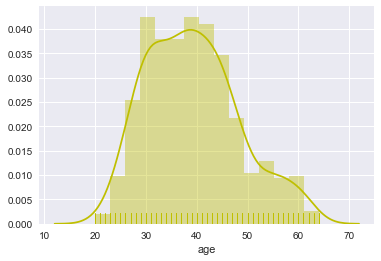

In [258]:
sns.distplot(automobile_data["age"],rug=True,color="y")
plt.show()

<b>Observation:</b>
The average age of person is ~40.

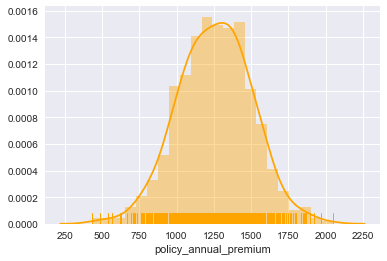

In [259]:
sns.distplot(automobile_data["policy_annual_premium"],rug=True,color="orange")
plt.show()

<b>Observation:</b>
The average policy annual premium is ~1300.

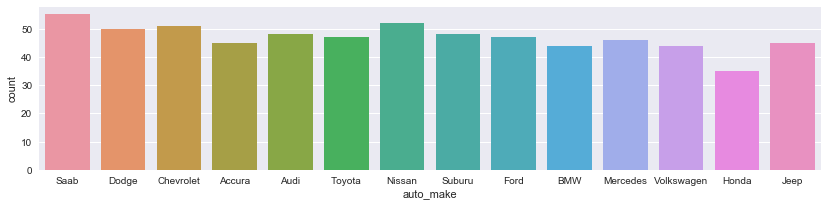

In [273]:
plt.figure(figsize=(14,3))
sns.countplot(automobile_data.auto_make)
plt.show()

<b>Observation:</b>
Most of the people have Saab and Nissan auto_make.

<b>Bi-Variate Analysis</b>

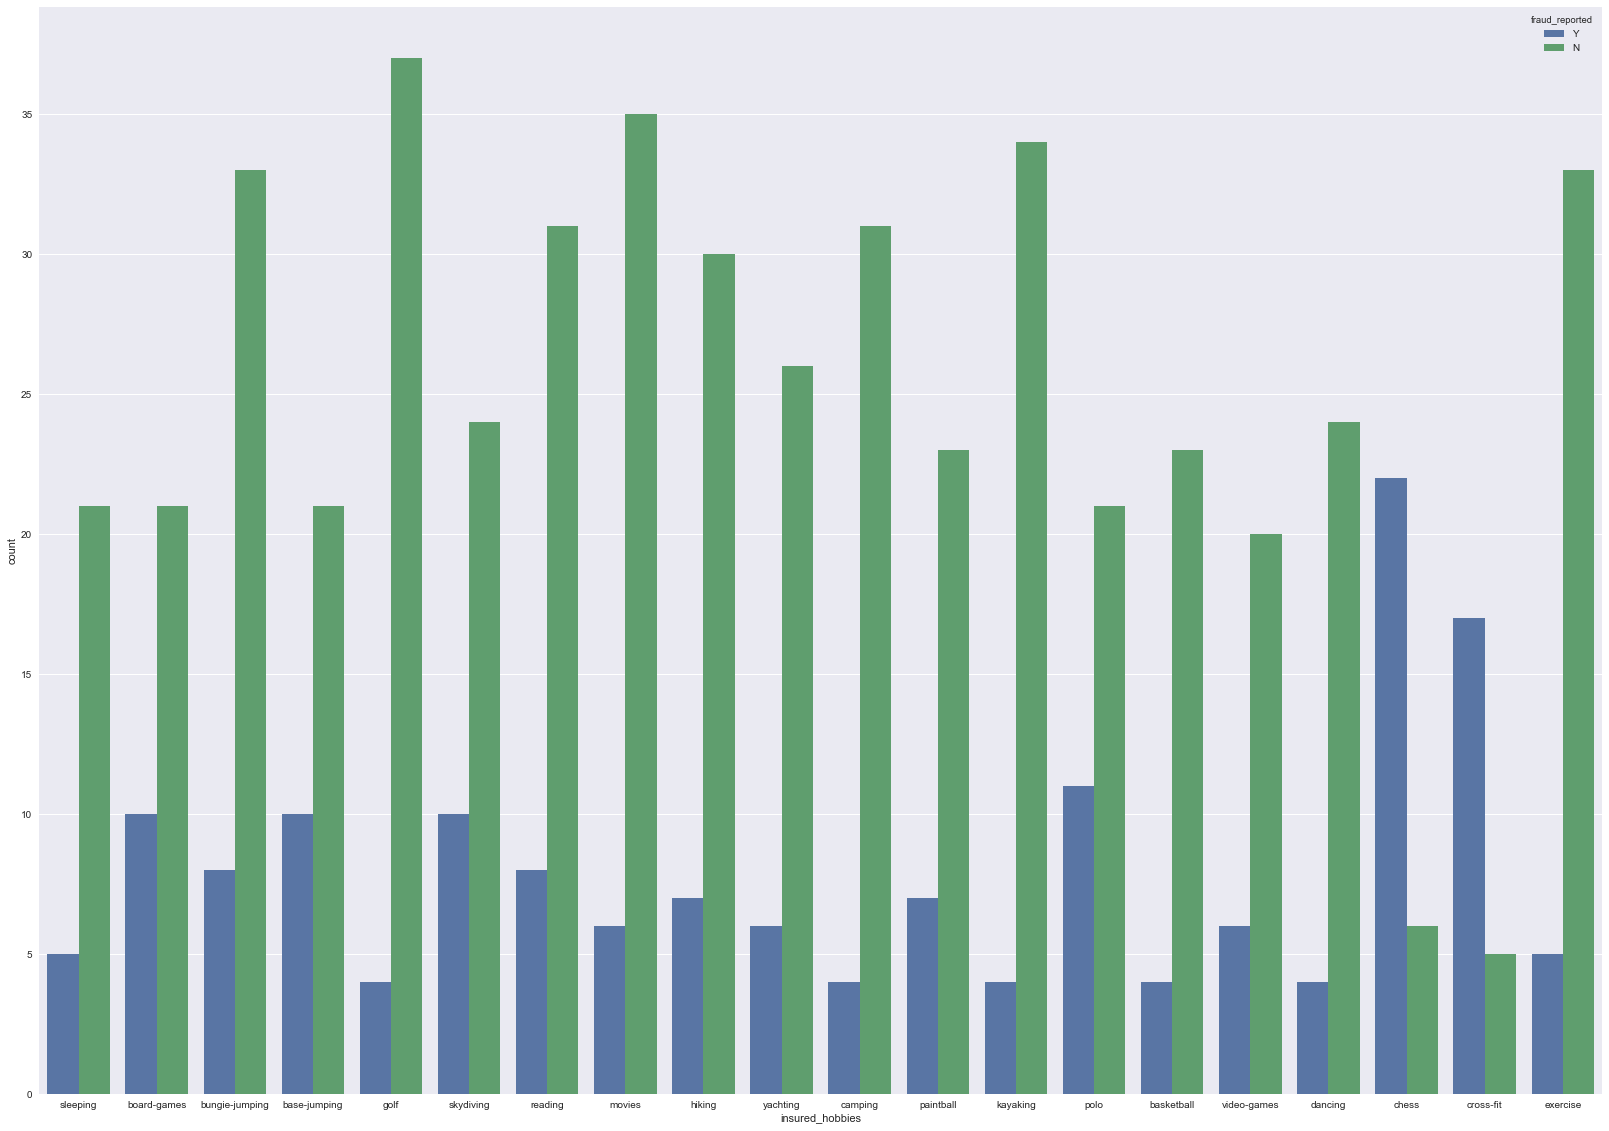

In [281]:
plt.figure(figsize=(28,20))
sns.countplot(x="insured_hobbies", hue="fraud_reported",data=automobile_data)
plt.show()

<b>Observation:</b>
From the above visualization, People who play chess have higher chances of getting fraud reported.

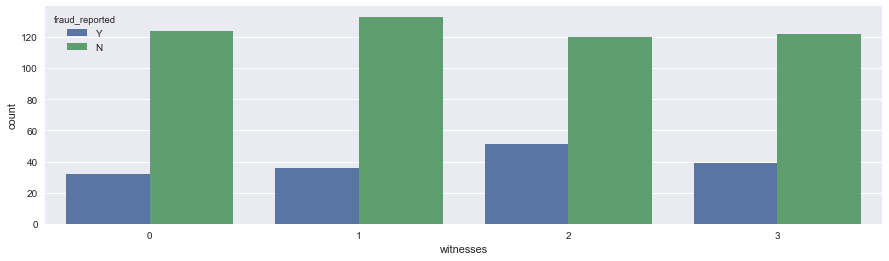

In [295]:
plt.figure(figsize=(15,4))
sns.countplot(x="witnesses", hue="fraud_reported",data=automobile_data)
plt.show()

<b>Observation:</b>
People who have atleast 1 witness has fraud reported.

<b>Multi-Variate Analysis</b>

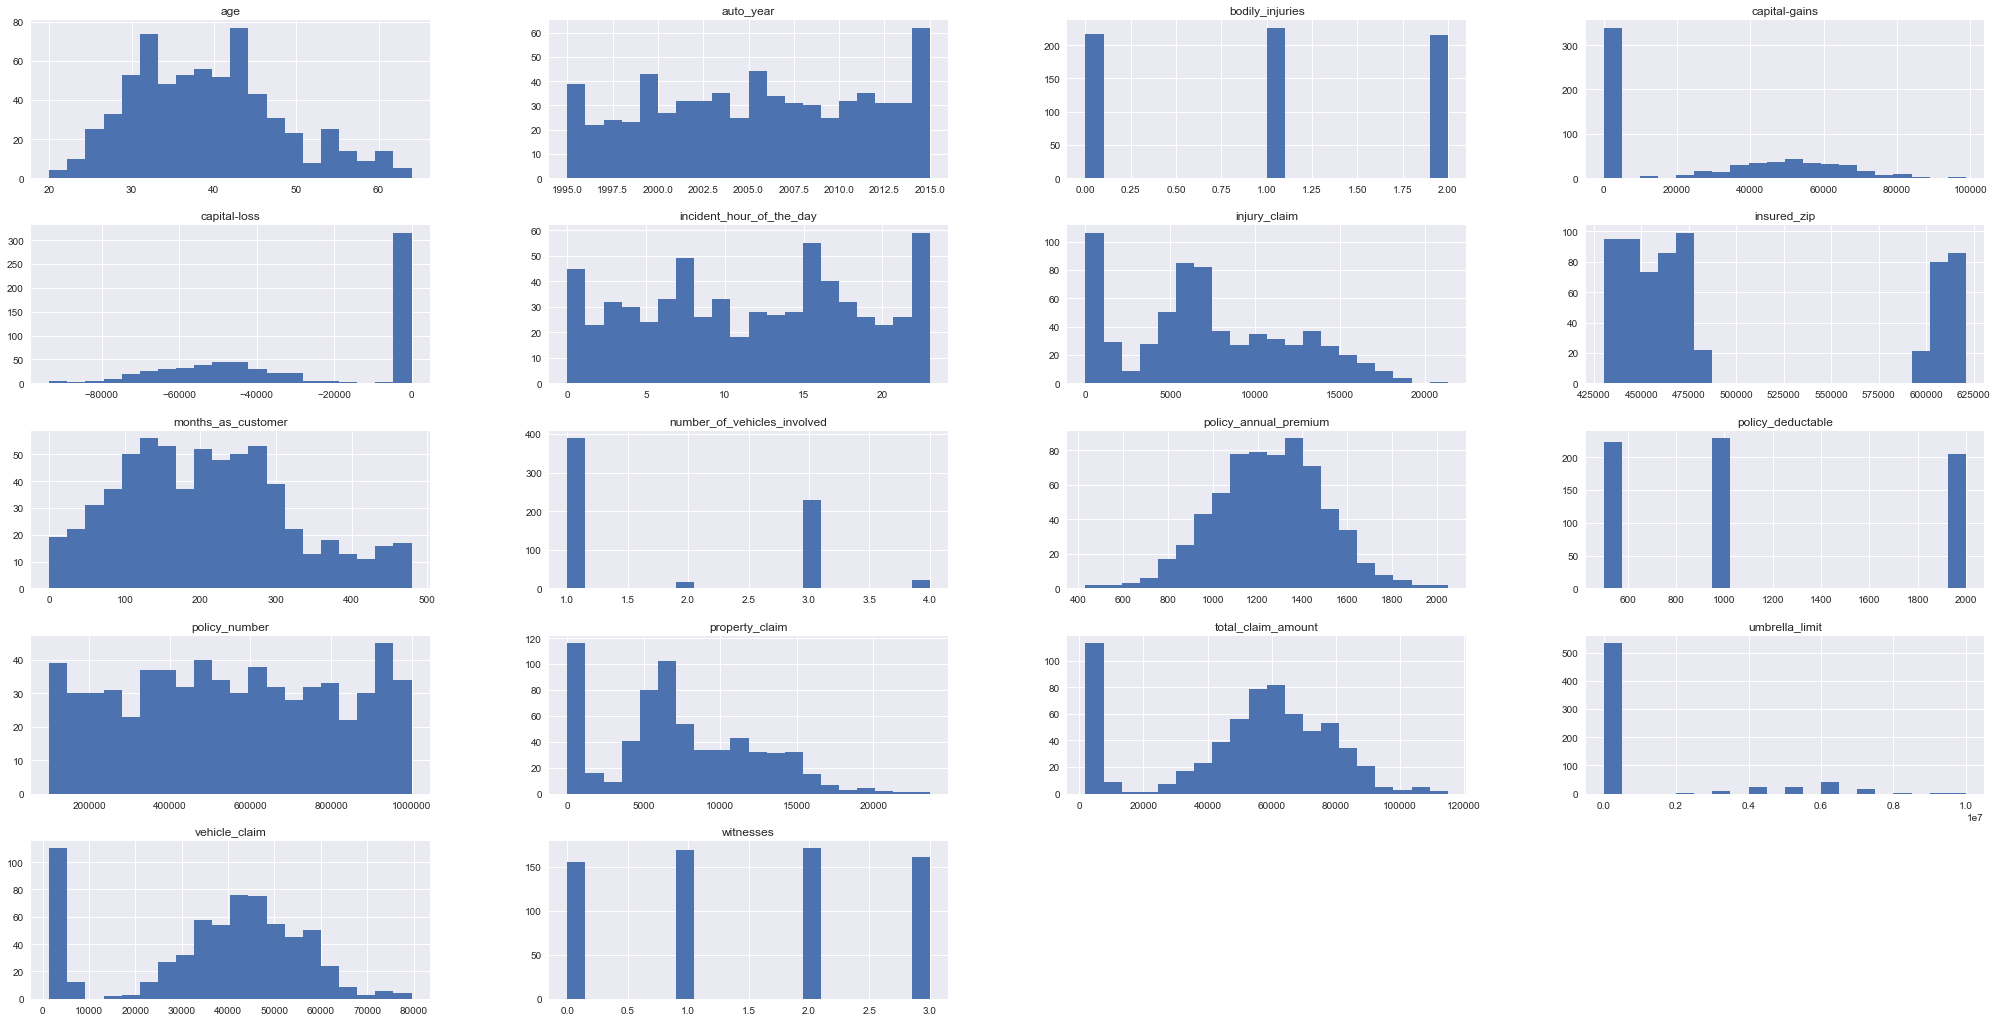

In [302]:
automobile_data.hist(figsize=(35,18),grid=True,bins=20);

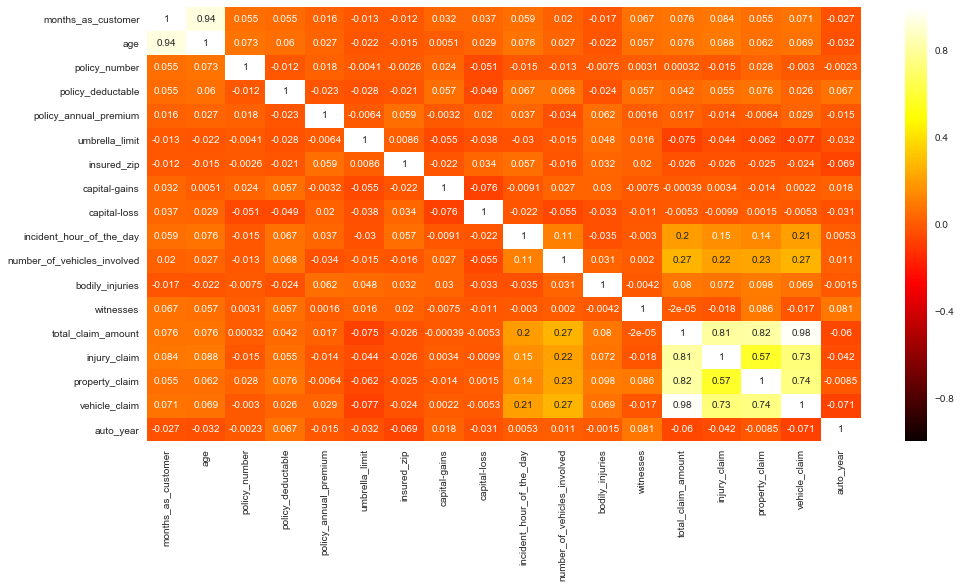

In [313]:
plt.figure(figsize=(16,8))
sns.heatmap(automobile_data.corr(), cmap="hot",annot=True)
plt.show()

<b>Observations:</b>
<li>There is multicollinearity between total_claim_amount, injury_claim, property_claim, vehicle_claim with incident_hour_of_the_day.</li>
<li>There is stron collinearity between total_claim_amount and vehicle_claim.</li>

In [7]:
# Removing one attribute(total day minutes) from dataset. As it has multicollinearity.
automobile_data.drop(["injury_claim", "property_claim","incident_hour_of_the_day"],axis=1,inplace=True)

<b>Label Encoder</b>

In [10]:
# Converting the categorical variables 
for col in automobile_data.columns:
    if automobile_data[col].dtype=="object":
        automobile_data[col]=LabelEncoder().fit_transform(automobile_data[col])

<b>Removing the Outliers</b>

In [14]:
z_score=abs(zscore(automobile_data))
print("The shape of dataset before removing outliers",automobile_data.shape)
automobile_data=automobile_data.loc[(z_score<3).all(axis=1)]
print("The shape of dataset after removing outliers",automobile_data.shape)

The shape of dataset before removing outliers (1000, 36)
The shape of dataset after removing outliers (981, 36)


<b>Dividing the input and output variables</b>

In [16]:
X= automobile_data.drop(["fraud_reported"],axis=1)
y= automobile_data["fraud_reported"]

In [17]:
# Lets bring the dataset features into same scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X= scaler.fit_transform(X)

<b>Splitting the data into training and testing (70:30)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3)

In [23]:
# We will use auc_roc score as the metrics 
def auc_roc_score(models,X,y):
    auc_roc_score=0
    for r_state in range(42,100):
        X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.30, random_state=r_state,stratify=y)
        models.fit(X_train,y_train)
        y_pred= models.predict(X_test)
        auc_roc=roc_auc_score(y_test,y_pred)
        if auc_roc>auc_roc_score:
            auc_roc_score=auc_roc
            auc_score=r_state
    print("Maximum AUC_ROC Score corresponding to:",auc_score," and it is :",round((auc_roc_score),2))

# Machine Learning Models:

As the target varible(fraud_reported) is binary, its a classification problem. We are implementing KNN Classifier, Gradient Boosting Classifier, Decision Tree Classifier, Logistic regression and SVM Classifier.

<b>KNN Classifier</b>

In [27]:
knc= KNeighborsClassifier()
neighbors={"n_neighbors":range(1,20)}
knc= GridSearchCV(knc, neighbors, cv=5,scoring="roc_auc")
knc.fit(X,y)
knc.best_params_

{'n_neighbors': 17}

In [28]:
knc=KNeighborsClassifier(n_neighbors=17)
auc_roc_score(knc,X,y)

Maximum AUC_ROC Score corresponding to: 89  and it is : 0.53


In [29]:
pred_knc= knc.predict(X_test)
k_score= knc.score(X_test, y_test)
print("The accuracy of the KNN Model is:",round((k_score),3))

The accuracy of the KNN Model is: 0.776


In [30]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_knc))

[[226   2]
 [ 64   3]]


<b>Observations:</b>
<li> There are 226 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 3 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 2 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 64 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_knc))

             precision    recall  f1-score   support

          0       0.78      0.99      0.87       228
          1       0.60      0.04      0.08        67

avg / total       0.74      0.78      0.69       295



In [33]:
mean_knn_cross=cross_val_score(knc, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(knc, X,y,cv=5,scoring="roc_auc").mean())
std_knn_cross= cross_val_score(knc, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for KNN Classifier from mean AUC_ROC score is",cross_val_score(knc, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.6661510293850897
standard deviation for KNN Classifier from mean AUC_ROC score is 0.0427474189715233


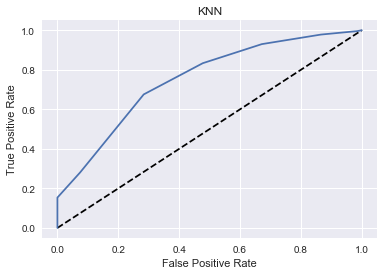

In [36]:
y_pred_prob= knc.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN")
plt.show()

<b>Gradient Booting Classifier</b>

In [37]:
g = GradientBoostingClassifier()
parameters= {'learning_rate': [0.01,0.03,0.05], 'subsample': [0.1, 0.5,0.3], 'n_estimators': [10,50,100], 'max_depth': [2,4,8]}
g= GridSearchCV(estimator=g, param_grid= parameters, cv=5, n_jobs=-1)
g.fit(X,y)
g.best_params_

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 50, 'subsample': 0.5}

In [39]:
g = GradientBoostingClassifier(learning_rate=0.05,max_depth=4,n_estimators=50,subsample=0.5)
auc_roc_score(g,X,y)

Maximum AUC_ROC Score corresponding to: 46  and it is : 0.8


In [40]:
pred_gb= g.predict(X_test)
g_score= g.score(X_test, y_test)
print("The accuracy of the Grading Boosting Model is:",round((g_score),3))

The accuracy of the Grading Boosting Model is: 0.932


In [41]:
print(confusion_matrix(y_test,pred_gb))

[[221   7]
 [ 13  54]]


<b>Observations:</b>
<li> There are 221 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 54 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 7 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 13 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [42]:
print(classification_report(y_test,pred_gb))

             precision    recall  f1-score   support

          0       0.94      0.97      0.96       228
          1       0.89      0.81      0.84        67

avg / total       0.93      0.93      0.93       295



In [43]:
mean_gb=cross_val_score(g, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(g, X,y,cv=5,scoring="roc_auc").mean())
std_gb= cross_val_score(g, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for Gradient  Boosting from mean AUC_ROC score is",cross_val_score(g, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.8583539285930225
standard deviation for Gradient  Boosting from mean AUC_ROC score is 0.03568230074831186


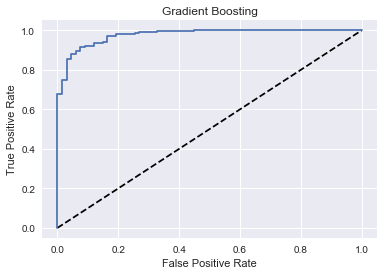

In [44]:
y_pred_prob= g.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Gradient Boosting")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boosting")
plt.show()

<b>Decision Tree Classifier</b>

In [53]:
parameters= {'criterion':['gini', 'entropy'],'max_depth': [1,2,4,6]}
dc=DecisionTreeClassifier()
dc = GridSearchCV(dc,parameters,cv=5)
dc.fit(X,y)
dc.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [55]:
dc=DecisionTreeClassifier(criterion='entropy', max_depth=4)
auc_roc_score(dc,X,y)

Maximum AUC_ROC Score corresponding to: 57  and it is : 0.89


In [56]:
pred_dc= dc.predict(X_test)
dc_score= dc.score(X_test, y_test)
print("The accuracy of the Decision Tree Model is:",round((dc_score),3))

The accuracy of the Decision Tree Model is: 0.898


In [57]:
print(confusion_matrix(y_test,pred_dc))

[[214  14]
 [ 16  51]]


<b>Observations:</b>
<li> There are 214 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 51 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 14 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 16 observation which are predicted Positive as FP(False Positive) and it is False.</li>

In [58]:
print(classification_report(y_test,pred_dc))

             precision    recall  f1-score   support

          0       0.93      0.94      0.93       228
          1       0.78      0.76      0.77        67

avg / total       0.90      0.90      0.90       295



In [59]:
mean_dc=cross_val_score(dc, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score Score after cross validation", cross_val_score(dc, X,y,cv=5,scoring="roc_auc").mean())
std_dc= cross_val_score(dc, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for Decision Tree Classifier from mean AUC_ROC score is",cross_val_score(dc, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score Score after cross validation 0.8617259772356249
standard deviation for Decision Tree Classifier from mean AUC_ROC score is 0.024941545150690143


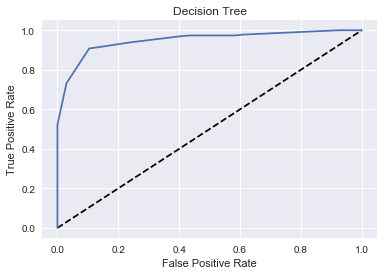

In [61]:
y_pred_prob= dc.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)

# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree")
plt.show()

<b>Logistic Regression</b>

In [45]:
l_r= LogisticRegression()
l_r.fit(X,y)
auc_roc_score(l_r,X,y)

Maximum AUC_ROC Score corresponding to: 74  and it is : 0.69


In [46]:
pred_lr= l_r.predict(X_test)
lr_score= l_r.score(X_test, y_test)
print("The accuracy of the Logistic Model is:",round((lr_score),3))

The accuracy of the Logistic Model is: 0.817


In [47]:
print(confusion_matrix(y_test,pred_lr))

[[211  17]
 [ 37  30]]


<b>Observations:</b>
<li> There are 211 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 30 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 17 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 37 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [48]:
print(classification_report(y_test,pred_lr))

             precision    recall  f1-score   support

          0       0.85      0.93      0.89       228
          1       0.64      0.45      0.53        67

avg / total       0.80      0.82      0.80       295



In [49]:
mean_lr=cross_val_score(l_r, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(l_r, X,y,cv=5,scoring="roc_auc").mean())
std_lr= cross_val_score(l_r, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for Logistic Regression from mean AUC_ROC score is",cross_val_score(l_r, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.7522664233024972
standard deviation for Logistic Regression from mean AUC_ROC score is 0.041152581086627886


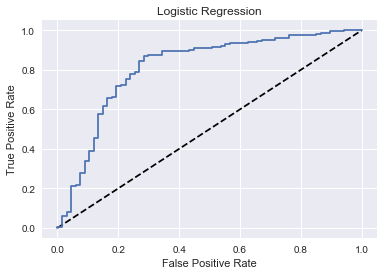

In [50]:
y_pred_prob= l_r.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)

plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.show()

<b>SVM Clasifier</b>

In [77]:
from sklearn.svm import SVC
sc= SVC(probability=True)
param= {"kernel":["linear", "poly","rbf"],"C":[0.001,0.01,1]}
sc=GridSearchCV(sc,param,cv=10)
sc.fit(X,y)
sc.best_params_

{'C': 1, 'kernel': 'linear'}

In [84]:
sc=SVC(kernel="linear", C=1,probability=True)
auc_roc_score(sc,X,y)

Maximum AUC_ROC Score corresponding to: 63  and it is : 0.76


In [85]:
pred_sc= sc.predict(X_test)
sc_score= sc.score(X_test, y_test)
print("The accuracy of the SVM Classifier Model is:",round((sc_score),3))

The accuracy of the SVM Classifier Model is: 0.834


In [86]:
print(confusion_matrix(y_test,pred_sc))

[[210  18]
 [ 31  36]]


<b>Observations:</b>
<li> There are 210 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 36 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 18 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 31 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [87]:
print(classification_report(y_test,pred_sc))

             precision    recall  f1-score   support

          0       0.87      0.92      0.90       228
          1       0.67      0.54      0.60        67

avg / total       0.82      0.83      0.83       295



In [88]:
mean_sv=cross_val_score(sc, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(sc, X,y,cv=5,scoring="roc_auc").mean())
std_sv= cross_val_score(sc, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for SVM Classifier from mean AUC_ROC score is",cross_val_score(sc, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.756746364653244
standard deviation for SVM Classifier from mean AUC_ROC score is 0.04053788542913217


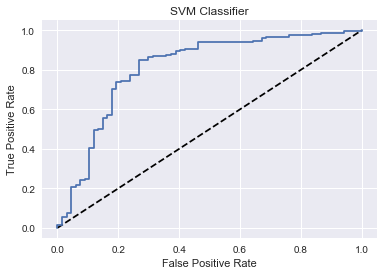

In [89]:
y_pred_prob= sc.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)

plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM Classifier")
plt.show()

# Evaluation:

In [91]:
#Lets initialise the data frame with columns model and f1_score
da= [["KNN Classifier",k_score,mean_knn_cross,std_knn_cross], ["Gradient Boosting Classifier",g_score,mean_gb,std_gb],["Decision Tree Classifier", dc_score,mean_dc,std_dc],["Logistic Regression",lr_score,mean_lr,std_lr],["SVM Classifier",sc_score,mean_sv,std_sv]]
comparsion= pd.DataFrame(da, columns=["Model Name", "Accuracy","Mean AUC ROC Score"," Std from mean Mean AUC ROC Score"], index=[1,2,3,4,5])
comparsion

,Model Name,Accuracy,Mean AUC ROC Score,Std from mean Mean AUC ROC Score
1,KNN Classifier,0.776271,0.666151,0.042747
2,Gradient Boosting Classifier,0.932203,0.851631,0.033109
3,Decision Tree Classifier,0.898305,0.863355,0.024942
4,Logistic Regression,0.816949,0.752266,0.041153
5,SVM Classifier,0.833898,0.756746,0.040538


<b>Observations:</b>
<li> We Calculated Mean AUC ROC Score and Std. Deviation from Mean AUC Score for model evaluation</li>
<li> From the above models, Gradient Boosting Classifier performed well with 93.22% accuracy with Mean AUC ROC Score of 0.851631 and Std. Deviation from mean AUC ROC Score of 0.033109.</li>

<b>Saving the Prediction</b>

As Gradient Boosting Classifier performed well, we are saving the prediction.

In [94]:
np.savetxt('Model16.csv',pred_gb,delimiter=',')

In [96]:
#Lets save the above model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(g, 'Project16.pkl')

['Project16.pkl']